# Results Analysis

In [22]:
import sqlite3
from itertools import product

import os
from copy import deepcopy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import *
from utils import *

In [ ]:
%load_ext autoreload
%autoreload 2

In [33]:
sns.set_theme(style="ticks")
# plt.rcParams['font.family'] = 'Times New Roman'

conn = sqlite3.connect(DB_PATH)

df = pd.read_sql("SELECT * FROM tsp_best_results", conn)

In [34]:
# ==== Methods to analyse ====
methods = ["random(5)", "model(5):v51"]

# ==== Instances to analyse ====
train_20_instances = [f"{size}_1000_{idx}" for size, idx in product([20], range(0, 10))]
train_50_instances = [f"{size}_1000_{idx}" for size, idx in product([50], range(0, 10))]
train_100_instances = [f"{size}_1000_{idx}" for size, idx in product([100], range(0, 10))]
all_train_instances = train_20_instances + train_50_instances + train_100_instances

test_20_instances = [f"{size}_1000_{idx}" for size, idx in product([20], range(100, 110))]
test_50_instances = [f"{size}_1000_{idx}" for size, idx in product([50], range(100, 110))]
test_100_instances = [f"{size}_1000_{idx}" for size, idx in product([100], range(100, 110))]
all_test_instances = test_20_instances + test_50_instances + test_100_instances

check(df, instances=test_20_instances, methods=methods)
check(df, instances=test_50_instances, methods=methods)
check(df, instances=test_100_instances, methods=methods)

check(df, instances=train_20_instances, methods=methods)
check(df, instances=train_50_instances, methods=methods)
check(df, instances=train_100_instances, methods=methods)

Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '0'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '1'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '2'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '3'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '4'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '5'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '6'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '7'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '8'
Missing results for instance '20_1000_100', method 'greedy_model(5):v51', seed '9'
Missing results for instance '20_1000_101', method 'greedy_model(5):v51', seed '0'
Missing results for instance '20_1000_101', method 'greedy_model(5):v51', seed '1'
Miss

False

In [20]:
avg_df = avg_over_seeds(df.loc[df['instance'].isin(test_20_instances)])
avg_df

,instance,subset,method,steps,initial_objective_value,objective_value,time,avg_time_per_step
0,20_1000_100,test,model(5):v51,1,11079.0,8766.4,1.4825,1.4825
1,20_1000_100,test,model(5):v51,2,11079.0,7302.2,2.2103,1.1053
2,20_1000_100,test,model(5):v51,3,11079.0,6455.7,2.8468,0.9489
3,20_1000_100,test,model(5):v51,4,11079.0,5835.9,3.4576,0.8645
4,20_1000_100,test,model(5):v51,5,11079.0,5438.7,4.2423,0.8484
...,...,...,...,...,...,...,...,...
275,20_1000_109,test,random(5),10,9641.0,4440.3,8.7875,0.8788
276,20_1000_109,test,random(5),20,9641.0,4225.6,17.3523,0.8676
277,20_1000_109,test,random(5),30,9641.0,4106.1,25.9027,0.8635
278,20_1000_109,test,random(5),40,9641.0,4080.4,34.1335,0.8533


## Objective value over steps

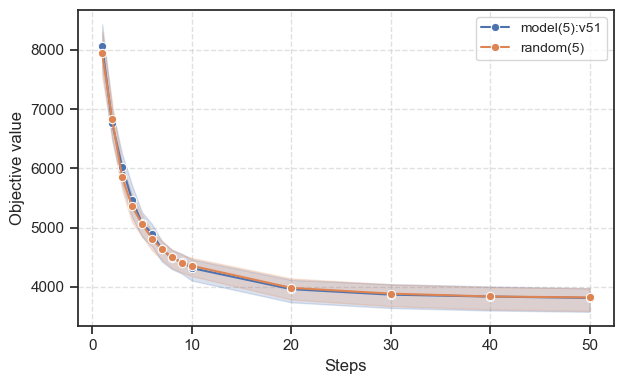

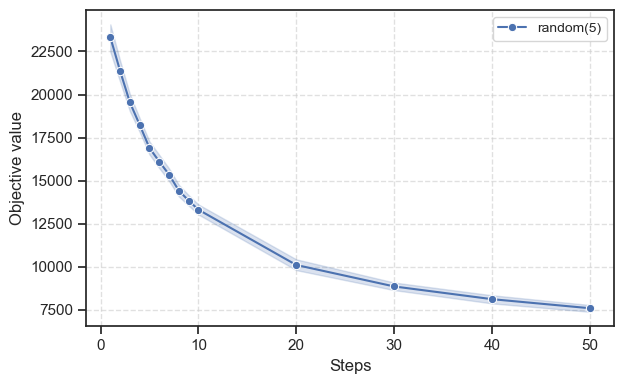

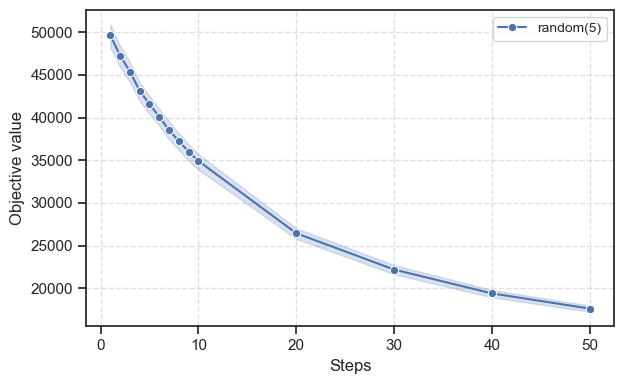

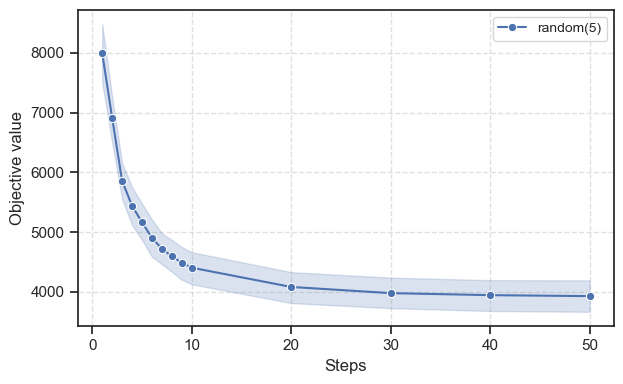

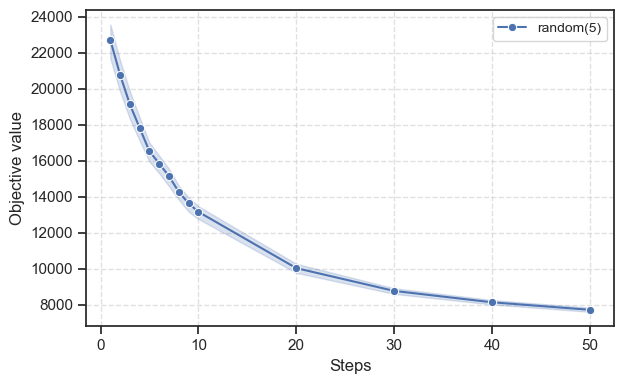

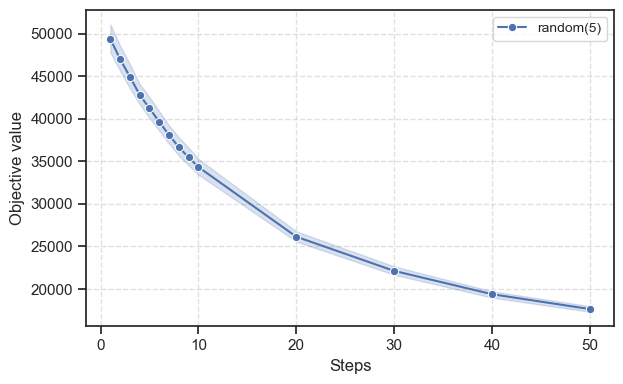

In [32]:
plot_value_over_steps(avg_df)
plot_value_over_steps(avg_over_seeds(df.loc[lambda x: x['instance'].isin(test_50_instances)]))
plot_value_over_steps(avg_over_seeds(df.loc[lambda x: x['instance'].isin(test_100_instances)]))

plot_value_over_steps(avg_over_seeds(df.loc[lambda x: x['instance'].isin(train_20_instances)]))
plot_value_over_steps(avg_over_seeds(df.loc[lambda x: x['instance'].isin(train_50_instances)]))
plot_value_over_steps(avg_over_seeds(df.loc[lambda x: x['instance'].isin(train_100_instances)]))

## Best Objective Values

In [13]:
best = df.loc[df.groupby('instance')['objective_value'].idxmin()]
best

,instance,subset,method,seed,steps,initial_objective_value,objective_value,time,avg_time_per_step
1744,100_1000_0,train,random(5),5,50,51795.0,16454.0,83.897,1.678
3138,100_1000_1,train,random(5),7,50,54585.0,16290.0,96.322,1.926
8511,100_1000_100,test,random(5),7,50,54160.0,16975.0,77.917,1.558
8553,100_1000_101,test,random(5),0,50,48258.0,15954.0,63.330,1.267
8735,100_1000_102,test,random(5),3,50,48420.0,15101.0,67.771,1.355
8847,100_1000_103,test,random(5),1,50,53041.0,15586.0,73.266,1.465
9015,100_1000_104,test,random(5),3,50,53166.0,15372.0,58.233,1.165
9141,100_1000_105,test,random(5),2,50,53529.0,16224.0,64.631,1.293
9281,100_1000_106,test,random(5),2,50,53687.0,16484.0,62.145,1.243
9519,100_1000_107,test,random(5),9,50,53519.0,16957.0,63.478,1.270


## Winning Rate
The proportion of instances (the winning rate) for which the methods in the rows outperform these in the columns.

In [7]:
def calculate_winning_rate(df, steps, methods=None):
    df = deepcopy(df)
    df = df[df['steps'] == steps]
    
    if not methods:
        methods = df['method'].unique()
    common_instances = (
        df.groupby('instance')['method']
        .apply(set)
        .loc[lambda x: x >= set(methods)].index
    )
    print(common_instances)
    
    # Filter data to include only common instances
    df = df[df['instance'].isin(common_instances)]
    
    results = pd.DataFrame(index=methods, columns=methods, dtype=float)

    for method1 in methods:
        for method2 in methods:
            if method1 == method2:
                results.loc[method1, method2] = None
            else:
                method1_values = df[df['method'] == method1].set_index('instance')['objective_value']
                method2_values = df[df['method'] == method2].set_index('instance')['objective_value']
                
                print(f"{method1} vs {method2}")
                print(method1_values.to_numpy())
                print(method2_values.to_numpy())
                
                wins = (method1_values < method2_values).sum()
                total_comparisons = len(method1_values)
                
                win_ratio = wins / total_comparisons * 100 if total_comparisons > 0 else 0
                results.loc[method1, method2] = win_ratio
    
    return results

In [8]:
winning_rates = calculate_winning_rate(avg_df[avg_df["subset"] == "test"], steps=10, methods=['random(5)', 'model(5):v51'])
winning_rates

Index(['20_1000_100', '20_1000_101', '20_1000_102', '20_1000_103',
       '20_1000_104', '20_1000_105', '20_1000_106', '20_1000_107',
       '20_1000_108', '20_1000_109'],
      dtype='object', name='instance')
random(5) vs model(5):v51
[4599.1 4211.9 4362.  4399.9 4391.4 4648.9 4406.8 4382.8 3704.5 4440.3]
[4532.7 4161.5 4186.3 4450.5 4491.1 4559.2 4443.3 4343.3 3494.  4496.2]
model(5):v51 vs random(5)
[4532.7 4161.5 4186.3 4450.5 4491.1 4559.2 4443.3 4343.3 3494.  4496.2]
[4599.1 4211.9 4362.  4399.9 4391.4 4648.9 4406.8 4382.8 3704.5 4440.3]


,random(5),model(5):v51
random(5),NaN,40.0
model(5):v51,60.0,NaN


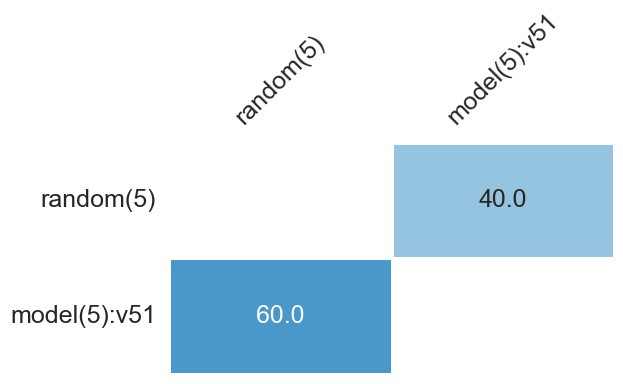

In [11]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style("white"):
    plt.figure(figsize=(6.4, 4))
    
    cmap = LinearSegmentedColormap.from_list("", ["orange", "yellowgreen"])
    cmap = sns.color_palette("Blues", as_cmap=True)
    # cmap = sns.diverging_palette(20, 230, as_cmap=True)
    cmap.set_bad(color="white")
    
    # Plot heatmap
    sns.heatmap(
        winning_rates,  # DataFrame with win ratios
        annot=True,           # Annotate cells with values
        fmt=".1f",            # Format values to 2 decimal places
        cmap=cmap,            # Custom colormap
        cbar=False,            # Add color bar
        linewidths=2,
        # linecolor="black",    # Color of the gridlines
        # mask=winning_rates.isnull()  # Explicitly mask NaN values
        annot_kws={"size": 18},
        vmin=0.0,
        vmax=100.0
    )
    
    plt.tick_params(axis='both', which='major', labelsize=18, labelbottom=False, bottom=False, top=False, labeltop=True)
    plt.xticks(rotation=45) # Rotate x-axis labels
    plt.yticks(rotation=0)             # Keep y-axis labels horizontal
    
    plt.tight_layout()
    plt.show()

## Improvement over steps
The improvement over the initial solution through steps of the LNS (or time).

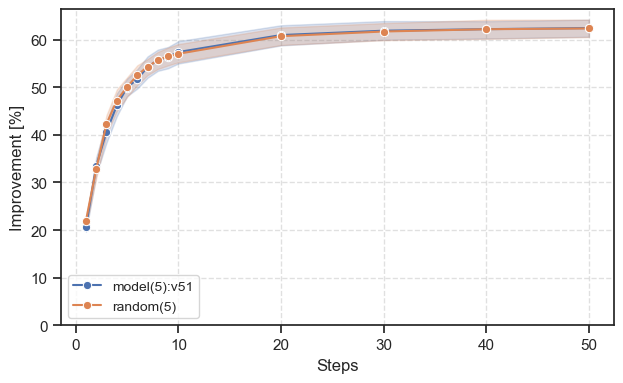

In [24]:
plot_value_over_steps(improvement(avg_df[lambda x: x.steps <= 50]), y="improvement", ylabel="Improvement [%]", ylim=[0])

## Gap

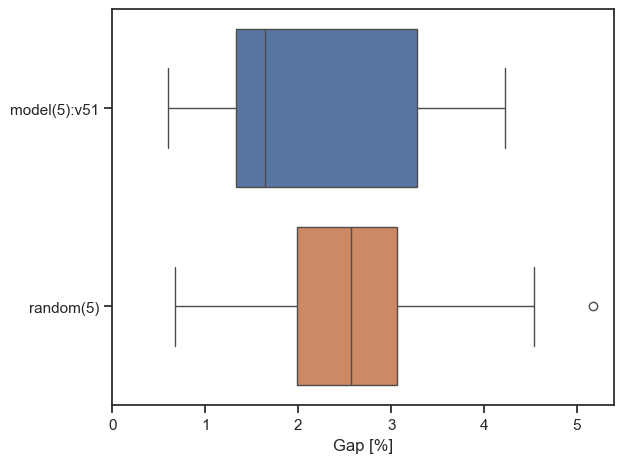

In [30]:
sns.boxplot(
    gap(avg_df.loc[lambda x: x.steps == 10], best),
    x="gap",
    y="method",
    hue="method",
)
plt.xlim(0)

plt.xlabel("Gap [%]", fontsize=12)
plt.ylabel("", fontsize=12)
plt.tight_layout()
plt.show()